# <span style="color:blue">Desafío - Inferencia e hipótesis</span>

## <span style="color:orange">Cargamos los datos</span>

In [143]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/andrea/Desktop/DATA SCIENCE/Modulo 3-Python-Estadistica/Estadística inferencial/earnings.csv')

df

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,61,120.0,0,15000.0,15.0,White,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,64,130.0,0,8000.0,8.0,White,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,72,194.0,1,60000.0,60.0,White,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,63,155.0,0,15000.0,15.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69


## <span style="color:orange">Obtenemos información del DataFrame</span>

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB


In [145]:
# Calcular la cantidad de datos nulos por columna

df.isnull().sum()

height                0
weight               27
male                  0
earn                  0
earnk                 0
ethnicity             0
education             2
mother_education    244
father_education    295
walk                  0
exercise              0
smokenow              1
tense                 1
angry                 1
age                   0
dtype: int64

In [146]:
# Eliminar filas con datos nulos y reasignar al DataFrame
df = df.dropna()

# Verificar la cantidad de datos nulos restantes
print(df.isnull().sum())


height              0
weight              0
male                0
earn                0
earnk               0
ethnicity           0
education           0
mother_education    0
father_education    0
walk                0
exercise            0
smokenow            0
tense               0
angry               0
age                 0
dtype: int64


## <span style="color:orange">1a.- Pruebas de hipótesis para medias poblacionales</span>

### <span style="color:purple">Desglose de la función:</span>

- **Parámetros de la Función**

    - **variable**: Nombre de la columna del DataFrame sobre la cual se quiere realizar la prueba de hipótesis. En este caso se usarán las variables 'earn', 'height', o 'age'.

    - **h0_value**: Este es el valor de la hipótesis nula. 

    - **n**: Este es el tamaño de la muestra que se usará para realizar la prueba. 

    - **tipo_prueba='dos_colas'**: Indica el tipo de prueba de hipótesis que se está realizando (dos colas, una cola mayor, una cola menor). Valor por defecto: 'dos_colas'. 


- **Código de la función**

    - **Seleccionar un valor alpha aleatorio -> alpha**: *np.random.uniform* es una función de numpy que genera un número aleatorio de una distribución uniforme. Los límites inferior y superior entre los cuales se generará el número aleatorio son 0.01 y 0.1.
    
    - **Extracción de la muestra aleatoria -> muestra**: Se extrae una muestra aleatoria de tamaño 'n' de la columna especificada por la variable. Esta muestra es un subconjunto de los datos que se usará para realizar la prueba de hipótesis.
    
    - **Cálculo de la media muestral -> media_muestra**: Se calcula la media de los valores en la muestra. Esta media muestral es una estimación de la media de la población completa.
    
    - **Realización de la prueba t de Student -> t_stat, p_value**: Aquí se realiza una prueba t de Student (mediante la función stats.ttest_1samp) para una muestra, comparando la media de la muestra con el valor hipotético h0_value. Esta prueba devuelve dos valores:

        - **t_stat**: El estadístico t calculado, que indica cuántos errores estándar está la media muestral de la media poblacional bajo H0.

        - **p_value**: El valor p asociado con la prueba t. Este valor mide la probabilidad de obtener una media muestral tan extrema o más extrema que la observada, dado que la hipótesis nula es cierta.
         
    - **Ajuste para pruebas de una cola**: Ajusta el valor p y determinar si se debe rechazar la hipótesis nula en pruebas de una cola.
    
         - **Prueba de Una Cola Mayor**: Con **p_value /= 2**, el valor p se divide por 2 para considerar solo una de las colas. Además **(t_stat > 0)** verifica si la estadística t es positiva, **(p_value < alpha)** verifica si el valor p ajustado es menor que el nivel de significancia. Si ambos son verdaderos, se rechaza la hipótesis nula.
         
         - **Prueba de Una Cola Menor**: La condición **(t_stat < 0)** verifica si la estadística t es negativa, y **(p_value < alpha)** verifica si el valor p ajustado es menor que el nivel de significancia. Si ambas condiciones son verdaderas, se rechaza la hipótesis nula.
 
    - **Cálculo del nivel de confianza -> coanfianza**: Se calcula el nivel de confianza como un porcentaje.
    
    - **Determinación del resultado de la prueba de hipótesis**: Este bloque toma la decisión final sobre si rechazar o no la hipótesis nula.

In [147]:
# Creamos la función

def prueba_hipotesis(df, variable, h0_value, n, tipo_prueba='dos_colas'):
    # Seleccionar un alpha aleatorio entre 0.01 y 0.1
    alpha = round(np.random.uniform(0.01, 0.1), 2)
    
    # Extraer una muestra aleatoria
    muestra = df[variable].sample(n)
    
    # Calcular la media muestral
    media_muestra = np.mean(muestra)
    
    # Realizar la prueba t de Student
    t_stat, p_value = stats.ttest_1samp(muestra, h0_value)
    
    # Ajuste para pruebas de una cola
    if tipo_prueba == 'una_cola_mayor':
        p_value /= 2
        rechaza_h0 = (t_stat > 0) and (p_value < alpha)
    elif tipo_prueba == 'una_cola_menor':
        p_value /= 2
        rechaza_h0 = (t_stat < 0) and (p_value < alpha)
    else:
        rechaza_h0 = p_value < alpha
    
    # Nivel de confianza
    confianza = (1 - alpha) * 100
    
    # Determinar si se rechaza o no la hipótesis nula
    if rechaza_h0:
        resultado = f"- Con un nivel de confianza del {confianza}%, se rechaza la hipótesis nula."
    else:
        resultado = f"- Con un nivel de confianza del {confianza}%, no se puede rechazar la hipótesis nula."
    
    # Solo devolvemos los tres valores solicitados
    return resultado, t_stat, p_value



#### <span style="color:blue">Calcular y desmotrar datos</span>

In [154]:
# Definir los parámetros para todas las pruebas de hipótesis, se incluyen descripciones para diferenciarlas
hipotesis_params = [
    {'descripcion': 'Earn: H0: x = 20000', 'variable': 'earn', 'h0_value': 20000, 'n': 25, 'tipo_prueba': 'dos_colas'},
    {'descripcion': 'Height: H0: x = 55', 'variable': 'height', 'h0_value': 55, 'n': 25, 'tipo_prueba': 'dos_colas'},
    {'descripcion': 'Age: H0: x = 44', 'variable': 'age', 'h0_value': 44, 'n': 25, 'tipo_prueba': 'dos_colas'},
    
    {'descripcion': 'Earn: H0: x = 35000', 'variable': 'earn', 'h0_value': 35000, 'n': 25, 'tipo_prueba': 'dos_colas'},
    {'descripcion': 'Height: H0: x = 68', 'variable': 'height', 'h0_value': 68, 'n': 25, 'tipo_prueba': 'dos_colas'},
    {'descripcion': 'Age: H0: x = 56', 'variable': 'age', 'h0_value': 56, 'n': 25, 'tipo_prueba': 'dos_colas'},
    
    {'descripcion': 'Earn: H0: x = 25000', 'variable': 'earn', 'h0_value': 25000, 'n': 25, 'tipo_prueba': 'una_cola_mayor'},
    {'descripcion': 'Height: H0: x = 63', 'variable': 'height', 'h0_value': 63, 'n': 25, 'tipo_prueba': 'una_cola_mayor'},
    {'descripcion': 'Age: H0: x = 51', 'variable': 'age', 'h0_value': 51, 'n': 25, 'tipo_prueba': 'una_cola_mayor'},
    
    {'descripcion': 'Earn: H0: x = 32000', 'variable': 'earn', 'h0_value': 32000, 'n': 25, 'tipo_prueba': 'una_cola_menor'},
    {'descripcion': 'Height: H0: x = 70', 'variable': 'height', 'h0_value': 70, 'n': 25, 'tipo_prueba': 'una_cola_menor'},
    {'descripcion': 'Age: H0: x = 62', 'variable': 'age', 'h0_value': 62, 'n': 25, 'tipo_prueba': 'una_cola_menor'}
]

# Ejecutar todas las pruebas de hipótesis
resultados = [(params['descripcion'], *prueba_hipotesis(df,variable=params['variable'],h0_value=params['h0_value'],
                                                        n=params['n'],
                                                        tipo_prueba=params['tipo_prueba']))for params in hipotesis_params]

# Mostrar los resultados de todas las pruebas
for i, (descripcion, resultado, t_stat, p_value) in enumerate(resultados, 1):
    print(f"* Prueba {i}: {descripcion}")
    print(resultado)
    print(f"- Valor t: {t_stat}")
    print(f"- Valor p: {p_value}")
    print()


* Prueba 1: Earn: H0: x = 20000
- Con un nivel de confianza del 94.0%, no se puede rechazar la hipótesis nula.
- Valor t: 1.1758827693544125
- Valor p: 0.251174765742621

* Prueba 2: Height: H0: x = 55
- Con un nivel de confianza del 91.0%, se rechaza la hipótesis nula.
- Valor t: 19.75658322294524
- Valor p: 2.364391579808232e-16

* Prueba 3: Age: H0: x = 44
- Con un nivel de confianza del 91.0%, no se puede rechazar la hipótesis nula.
- Valor t: -1.0873621635534034
- Valor p: 0.2876768969314548

* Prueba 4: Earn: H0: x = 35000
- Con un nivel de confianza del 94.0%, no se puede rechazar la hipótesis nula.
- Valor t: -1.87688228227789
- Valor p: 0.07274391600156847

* Prueba 5: Height: H0: x = 68
- Con un nivel de confianza del 98.0%, no se puede rechazar la hipótesis nula.
- Valor t: -0.3845779278544435
- Valor p: 0.7039368722526218

* Prueba 6: Age: H0: x = 56
- Con un nivel de confianza del 95.0%, se rechaza la hipótesis nula.
- Valor t: -4.499014727557142
- Valor p: 0.0001484805389

## <span style="color:orange">1b.- Calcular la media poblacional para cada variable</span>


In [149]:
# Calcular la media poblacional para cada variable
media_earn = df['earn'].mean()
media_height = df['height'].mean()
media_age = df['age'].mean()

print(f'*La media poblacional para la variable "earn" es: {media_earn}\n')
print(f'*La media poblacional para la variable "height" es: {media_height}\n')
print(f'*La media poblacional para la variable "age" es: {media_age}')

*La media poblacional para la variable "earn" es: 22356.17638888889

*La media poblacional para la variable "height" es: 66.6673611111111

*La media poblacional para la variable "age" es: 40.82222222222222


##### <span style="color:purple">Conclusión:</span> La coherencia entre los valores de t, los valores p y las medias calculadas confirma que las decisiones que se tomaron son correctas. Por lo tanto, podemos decir con confianza que el análisis es correcto y que las pruebas de hipótesis se realizaron y evaluaron de manera adecuada.

## <span style="color:orange">2.- Estimación de proporciones de hombres en el dataset</span>

### <span style="color:purple">Desglose de la función:</span>

- **Parámetros de la función**

    - **data**: Es el dataset que debe contener una columna llamada 'male', donde los valores son 1 para hombres y 0 para mujeres.
    
    - **alpha**: Es el nivel de significancia utilizado para calcular el intervalo de confianza.
    
    - **muestra_size=50**: Este parámetro define el tamaño de la muestra que vamos a tomar del dataset. Tiene un valor predeterminado de 50.
    
- **Código de la función**

    - **Tomar una Muestra Aleatoria:**
    
        - **data.sample**: Toma una muestra aleatoria de 'muestra_size'.
            - **n=muestra_size**: Especifica el tamaño de la muestra.
            - **random_state=1**: Asegura que la muestra sea reproducible, es decir que cada vez que se ejecute el código se obtendrá la misma muestra si usamos el mismo random_state.
            
     - **Calcular la Proporción de Hombres en la Muestra:**
     
         - **muestra['male'].mean()**: Calcula la proporción de hombres en la muestra seleccionada. Con **muestra['male']** se accede a la columna 'male', que contiene 1 para hombres y 0 para mujeres. A se vez con **.mean()** se calcula el promedio de la columna.

    - **Calcular el Intervalo de Confianza para la Proporción:**
    
        - **sm.stats.proportion_confint**: Es una función que calcula el intervalo de confianza para una proporción.

            - **count=prop_hombres * muestra_size**: Calcula el número de hombres en la muestra. Donde **prop_hombres** es la proporción, y **muestra_size** es el tamaño de la muestra. Multiplicando los dos valores se  obtiene cuántos hombres hay en la muestra.
            - **nobs=muestra_size**: Especifica el tamaño de la muestra.
            - **alpha=alpha**: Define el nivel de significancia. 
            - **method='normal'**: Especifica el método para calcular el intervalo de confianza. En este caso se utiliza el método basado en la distribución normal.
    
    - **Devolver la Proporción Estimada y el Intervalo de Confianza:**
    
        - **prop_hombres**: Es la proporción de hombres en la muestra.
        - **intervalo_confianza[0]**: Es el límite inferior del intervalo de confianza para la proporción.
        - **intervalo_confianza[1]**: Es el límite superior del intervalo de confianza para la proporción.


In [150]:
def estimar_proporcion_hombres(data, alpha, muestra_size=50):
    # 1. Tomar una muestra aleatoria de n individuos del conjunto de datos
    muestra = data.sample(n=muestra_size, random_state=1)
    
    # 2. Calcular la proporción de hombres en la muestra
    prop_hombres = muestra['male'].mean()
    
    # 3. Calcular el intervalo de confianza para la proporción utilizando statsmodels
    intervalo_confianza = sm.stats.proportion_confint(count=prop_hombres * muestra_size, nobs=muestra_size, 
                                                      alpha=alpha, 
                                                      method='normal')
    
    # 4. Devolver la proporción estimada y el intervalo de confianza
    return prop_hombres, intervalo_confianza[0], intervalo_confianza[1]


#### <span style="color:blue">Calcular y desmotrar datos</span>

In [151]:
# Para alpha = 0.05
prop_muestra_05, int_inf_05, int_sup_05 = estimar_proporcion_hombres(df, alpha=0.05, muestra_size=50)
print(f"- Con un nivel de significancia de 0.05:")
print(f"  *Proporción estimada: {prop_muestra_05}")
print(f"  *Intervalo de confianza: [{int_inf_05}, {int_sup_05:.5f}]\n")

# Para alpha = 0.01
prop_muestra_01, int_inf_01, int_sup_01 = estimar_proporcion_hombres(df, alpha=0.01, muestra_size=50)
print(f"- Con un nivel de significancia de 0.01:")
print(f"  *Proporción estimada: {prop_muestra_01}")
print(f"  *Intervalo de confianza: [{int_inf_01}, {int_sup_01}]\n")

# Comparar con la proporción real
prop_real = df['male'].mean()
print(f"- Proporción real en el dataset completo: {prop_real:.6f}")


- Con un nivel de significancia de 0.05:
  *Proporción estimada: 0.32
  *Intervalo de confianza: [0.19070178350935835, 0.44930]

- Con un nivel de significancia de 0.01:
  *Proporción estimada: 0.32
  *Intervalo de confianza: [0.15007333932650732, 0.48992666067349266]

- Proporción real en el dataset completo: 0.377778


## <span style="color:orange">3.- Análisis de la Influencia del Género sobre el Sueldo</span>

In [152]:
# Filtrar los sueldos de hombres
# Se seleccionan las filas donde la columna 'male' es igual a 1 (hombres)
# Luego, se accede a la columna 'earn' que contiene los sueldos
sueldos_hombres = df[df['male'] == 1]['earn']

# Filtrar los sueldos de mujeres
# Se seleccionan las filas donde la columna 'male' es igual a 0 (mujeres)
# Luego, se accede a la columna 'earn' 
sueldos_mujeres = df[df['male'] == 0]['earn']

# Realizar una prueba t para muestras independientes (t-test)
# Esta prueba compara las medias de dos grupos (hombres y mujeres) para ver si hay una diferencia significativa
# equal_var=False se usa porque no asumimos que las dos muestras tengan varianzas iguales
t_stat, p_valor = stats.ttest_ind(sueldos_hombres, sueldos_mujeres, equal_var=False)

# Evaluar si el valor p es menor que 0.05 (nivel de significancia del 5%)
# Si el p-valor es menor que 0.05, rechazamos la hipótesis nula de que no hay diferencia entre los sueldos

if p_valor < 0.05:
    print("**Existe una diferencia significativa en los sueldos entre hombres y mujeres.")
else:
    print("**No existe una diferencia significativa en los sueldos entre hombres y mujeres.")


**Existe una diferencia significativa en los sueldos entre hombres y mujeres.


### <span style="color:purple">Explicación:</span>

**Interpretación del valor p**:

- **if p_valor < 0.05**: Si el valor p es menor que 0.05, indica que hay menos de un 5% de probabilidad de observar una diferencia grande en las medias de sueldos entre hombres y mujeres si en realidad no hubiera ninguna diferencia. En ese caso, concluimos que sí hay una diferencia significativa.

- **else**: Si el valor p es mayor o igual a 0.05, no tenemos suficiente evidencia para decir que hay una diferencia significativa entre los sueldos de hombres y mujeres.

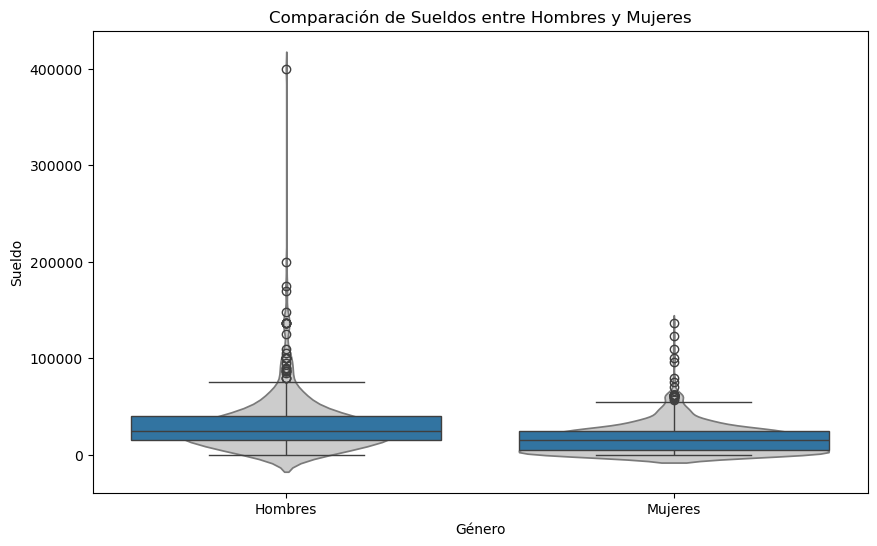

In [153]:
# Mostrar en un gráfico la diferencia de sueldos de hombres y mujeres para facilitar la visualización
data_sueldos = pd.DataFrame({
    'Sueldo': pd.concat([sueldos_hombres, sueldos_mujeres], axis=0),
    'Género': ['Hombres'] * len(sueldos_hombres) + ['Mujeres'] * len(sueldos_mujeres)})

# Crear un gráfico de cajas y violín para comparar los sueldos
plt.figure(figsize=(10, 6))

# Gráfico de violín
sns.violinplot(x='Género', y='Sueldo', data=data_sueldos, inner=None, color=".8")
# Gráfico de cajas sobre el gráfico de violín
sns.boxplot(x='Género', y='Sueldo', data=data_sueldos)

# Título y etiquetas
plt.title('Comparación de Sueldos entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Sueldo')

# Mostrar el gráfico
plt.show()
